In [ ]:
!pip install astroquery
!pip install alerce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 22.3 MB/s eta 0:00:00


In [ ]:
from alerce.core import Alerce
alerce = Alerce()
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from astropy.table import Table, Column
from astropy.coordinates import Distance, Galactic, SkyCoord
from astropy.cosmology import WMAP7
from astroquery.ipac.irsa.irsa_dust import IrsaDust
from astroquery.ned import Ned
from IPython.display import HTML
from ipywidgets import Layout, Box, widgets




<ipython-input-3-72067f9f181b>:19: DeprecationWarning: the ``ned`` module has been moved to astroquery.ipac.ned, please update your imports.
  from astroquery.ned import Ned


In [ ]:
# Getting list of classifiers
classifiers = alerce.query_classifiers()
print(classifiers)

[{'classifier_name': 'lc_classifier', 'classifier_version': 'hierarchical_random_forest_1.0.0', 'classes': ['SNIa', 'SNIbc', 'SNII', 'SLSN', 'QSO', 'AGN', 'Blazar', 'CV/Nova', 'YSO', 'LPV', 'E', 'DSCT', 'RRL', 'CEP', 'Periodic-Other']}, {'classifier_name': 'lc_classifier_top', 'classifier_version': 'hierarchical_random_forest_1.0.0', 'classes': ['Transient', 'Stochastic', 'Periodic']}, {'classifier_name': 'lc_classifier_transient', 'classifier_version': 'hierarchical_random_forest_1.0.0', 'classes': ['SNIa', 'SNIbc', 'SNII', 'SLSN']}, {'classifier_name': 'lc_classifier_stochastic', 'classifier_version': 'hierarchical_random_forest_1.0.0', 'classes': ['QSO', 'AGN', 'Blazar', 'CV/Nova', 'YSO']}, {'classifier_name': 'lc_classifier_periodic', 'classifier_version': 'hierarchical_random_forest_1.0.0', 'classes': ['LPV', 'E', 'DSCT', 'RRL', 'CEP', 'Periodic-Other']}, {'classifier_name': 'stamp_classifier', 'classifier_version': 'stamp_classifier_1.0.0', 'classes': ['SN', 'AGN', 'VS', 'asteroi

In [ ]:
# Getting classes for a classifier and version
classes = alerce.query_classes("lc_classifier",
"hierarchical_random_forest_1.0.0")
print(classes)


[{'name': 'SNIa'}, {'name': 'SNIbc'}, {'name': 'SNII'}, {'name': 'SLSN'}, {'name': 'QSO'}, {'name': 'AGN'}, {'name': 'Blazar'}, {'name': 'CV/Nova'}, {'name': 'YSO'}, {'name': 'LPV'}, {'name': 'E'}, {'name': 'DSCT'}, {'name': 'RRL'}, {'name': 'CEP'}, {'name': 'Periodic-Other'}]


AGN


In [ ]:
#Definir AGN'S

min_firstmjd = Time("2017-11-01T00:00:00", format="isot", scale="utc").mjd

AGNs = alerce.query_objects(classifier="lc_classifier",
                           class_name="AGN",
                           probability=0.5,
                           ndet=[30, 200],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')

AGNs.set_index("oid", inplace=True)


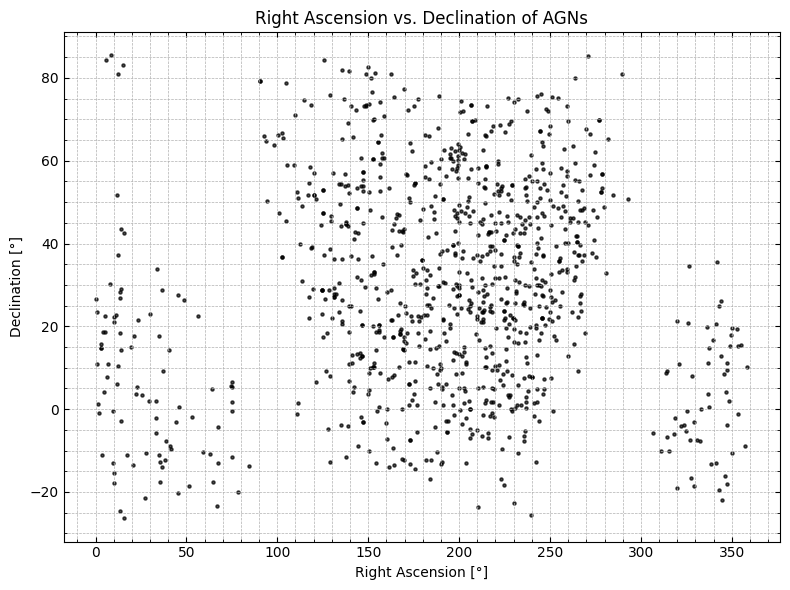

In [ ]:
# Ploteo de coordenadas ecuatioriales

plt.figure(figsize=(8, 6))
plt.scatter(AGNs.meanra, AGNs.meandec, c="black",alpha=0.7,s=5)
plt.xlabel('Right Ascension [°]')
plt.ylabel('Declination [°]')
plt.title('Right Ascension vs. Declination of AGNs')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tight_layout()


In [ ]:
#Pasar a coordenadas galácticas

COAR= SkyCoord(ra=AGNs.meanra, dec=AGNs.meandec,unit="degree") #COORDENADAS EN AR/DEC
COAR_GL=COAR.transform_to(Galactic)


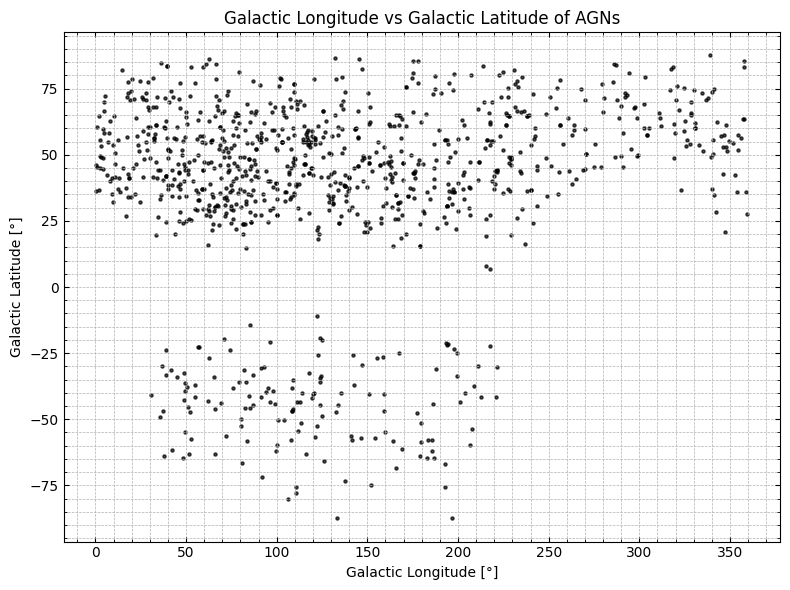

In [ ]:
# Ploteo de coordenadas galácticas

plt.figure(figsize=(8, 6))
plt.scatter(COAR_GL.l, COAR_GL.b, c="black",alpha=0.7,s=5)
plt.xlabel('Galactic Longitude [°]')
plt.ylabel('Galactic Latitude [°]')
plt.title('Galactic Longitude vs Galactic Latitude of AGNs')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tight_layout()

QUASARES


In [ ]:
#Definir QSO's

QSOs = alerce.query_objects(classifier="lc_classifier",
                           class_name="QSO",
                           probability=0.5,
                           ndet=[30, 200],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')
QSOs.set_index("oid", inplace=True)
QSOs.head()


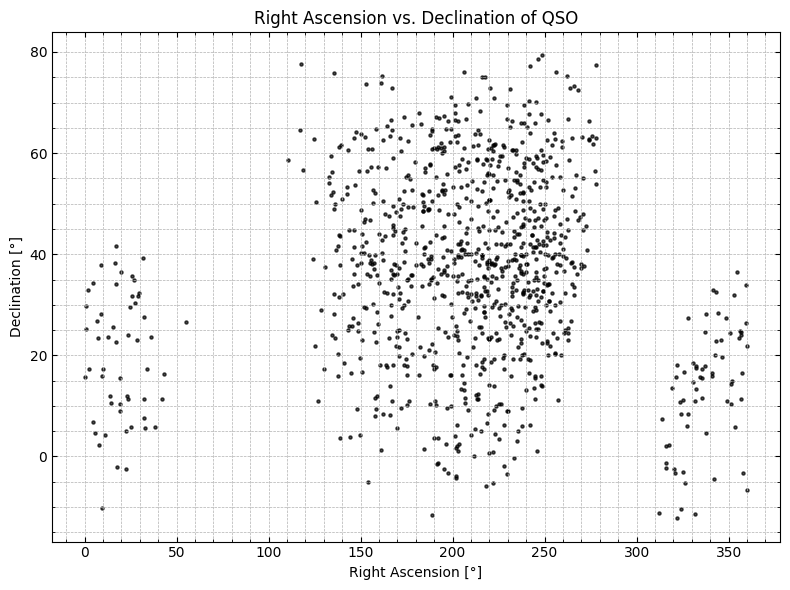

In [ ]:
# Ploteo de coordenadas ecuatioriales

plt.figure(figsize=(8, 6))
plt.scatter(QSOs.meanra, QSOs.meandec, c="black",alpha=0.7,s=5)
plt.xlabel('Right Ascension [°]')
plt.ylabel('Declination [°]')
plt.title('Right Ascension vs. Declination of QSO')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tight_layout()

In [ ]:
#Pasar a coordenadas galácticas

COQSO= SkyCoord(ra=QSOs.meanra, dec=QSOs.meandec,unit="degree") #COORDENADAS EN AR/DEC
COQSO_GL=COQSO.transform_to(Galactic)


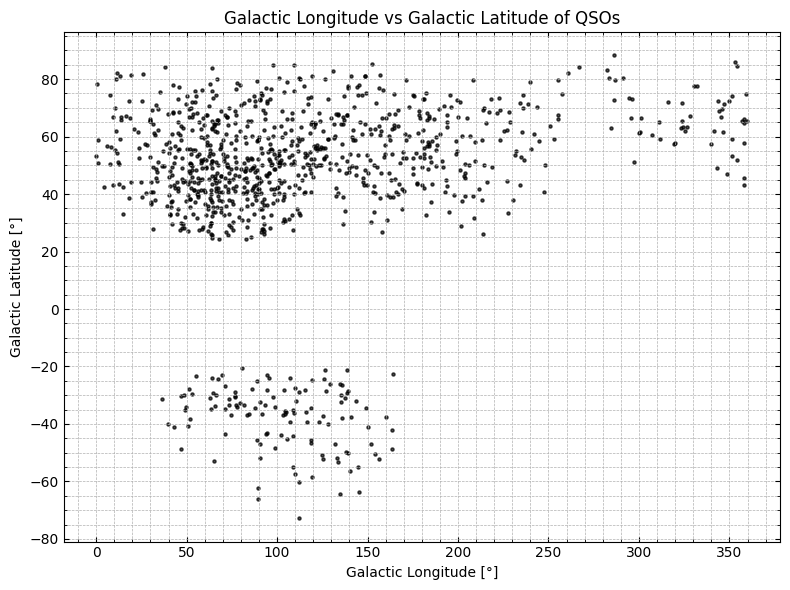

In [ ]:
# Ploteo de coordenadas galácticas

plt.figure(figsize=(8, 6))
plt.scatter(COQSO_GL.l, COQSO_GL.b, c="black",alpha=0.7,s=5)
plt.xlabel('Galactic Longitude [°]')
plt.ylabel('Galactic Latitude [°]')
plt.title('Galactic Longitude vs Galactic Latitude of QSOs')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tight_layout()

SUPERNOVAS SUPERLUMINOSAS



In [ ]:
#Definir SLSN's



SLSNs = alerce.query_objects(classifier="lc_classifier",
                           class_name="SLSN",
                           probability=0.5,
                           ndet=[30, 200],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')
SLSNs.set_index("oid", inplace=True)
SLSNs.head()


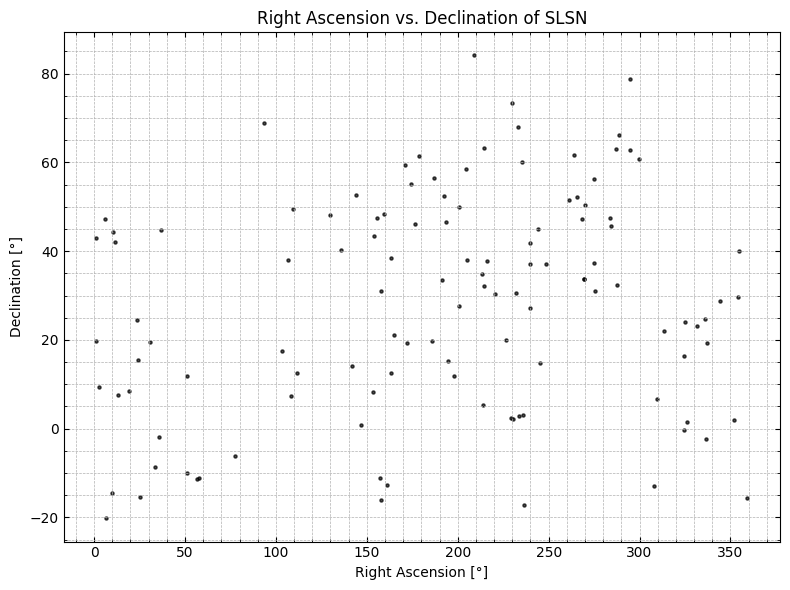

In [ ]:
# Ploteo de coordenadas ecuatioriales

plt.figure(figsize=(8, 6))
plt.scatter(SLSNs.meanra, SLSNs.meandec, c="black",alpha=0.7,s=5)
plt.xlabel('Right Ascension [°]')
plt.ylabel('Declination [°]')
plt.title('Right Ascension vs. Declination of SLSN')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tight_layout()

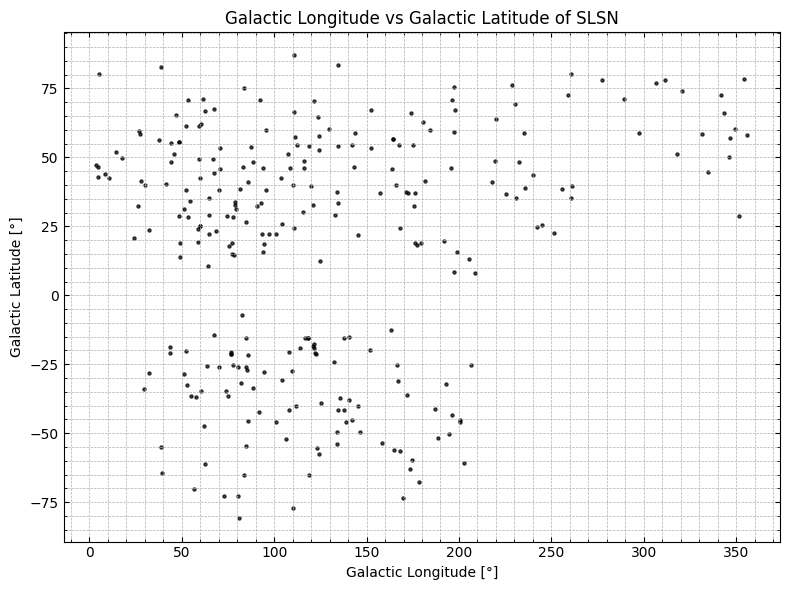

In [ ]:
#Pasar a coordenadas galácticas

COSLSN= SkyCoord(ra=SLSNs.meanra, dec=SLSNs.meandec,unit="degree") #COORDENADAS EN AR/DEC
COSLSN_GL=COSLSN.transform_to(Galactic)



# Ploteo de coordenadas galácticas


plt.figure(figsize=(8, 6))
plt.scatter(COSLSN_GL.l, COSLSN_GL.b, c="black",alpha=0.7,s=5)
plt.xlabel('Galactic Longitude [°]')
plt.ylabel('Galactic Latitude [°]')
plt.title('Galactic Longitude vs Galactic Latitude of SLSN')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tight_layout()

Hacer un ploteo de AR vs DEC de AGN's y estrellas variables periódicas


In [ ]:

# I) DSCT
DSCTs = alerce.query_objects(classifier="lc_classifier",
                           class_name="DSCT",
                           probability=0.5,
                           ndet=[30, 200],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')
DSCTs.set_index("oid", inplace=True)
AR_DSCT=DSCTs.meanra
DEC_DSCT=DSCTs.meandec

# II) LPV
LPVs = alerce.query_objects(classifier="lc_classifier",
                           class_name="LPV",
                           probability=0.5,
                           ndet=[30, 200],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')
LPVs.set_index("oid", inplace=True)
AR_LPV=LPVs.meanra
DEC_LPV=LPVs.meandec

# III) RRL
RRLs = alerce.query_objects(classifier="lc_classifier",
                           class_name="RRL",
                           probability=0.5,
                           ndet=[30, 200],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')
RRLs.set_index("oid", inplace=True)
AR_RRL=RRLs.meanra
DEC_RRL=RRLs.meandec

# IV) CEP
CEPs = alerce.query_objects(classifier="lc_classifier",
                           class_name="CEP",
                           probability=0.5,
                           ndet=[30, 200],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')
CEPs.set_index("oid", inplace=True)
AR_CEP=CEPs.meanra
DEC_CEP=RRLs.meandec


Una vez ya definidas las variables espaciales de nuestros objetos de estudio.


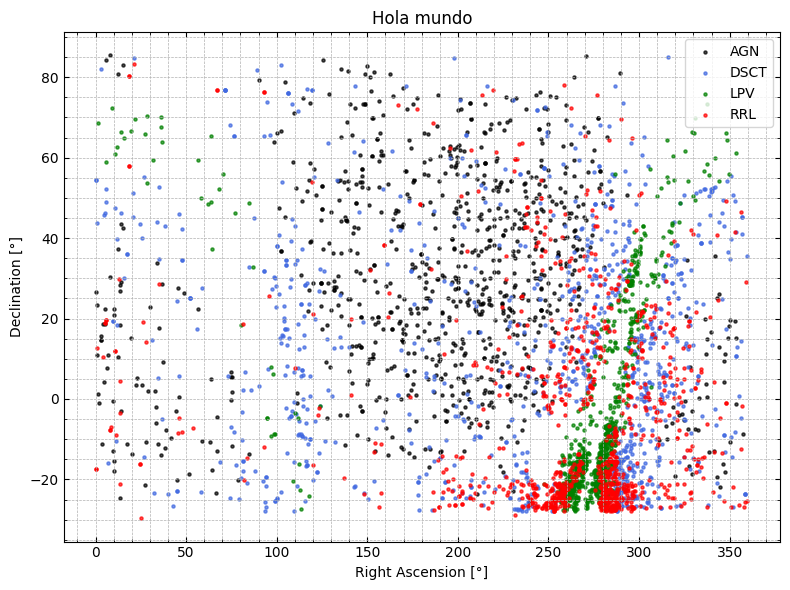

In [ ]:
# Ploteo de coordenadas ecuatioriales

plt.figure(figsize=(8, 6))
plt.scatter(AGNs.meanra, AGNs.meandec, c="black",alpha=0.7,s=5,label="AGN")
plt.scatter(AR_DSCT,DEC_DSCT, c="royalblue",alpha=0.7,s=5,label="DSCT")
plt.scatter(AR_LPV,DEC_LPV, c="green",alpha=0.7,s=5,label="LPV")
plt.scatter(AR_RRL,DEC_RRL, c="red",alpha=0.7,s=5,label="RRL")





plt.xlabel('Right Ascension [°]')
plt.ylabel('Declination [°]')
plt.title('Equatorial Distribution')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tight_layout()


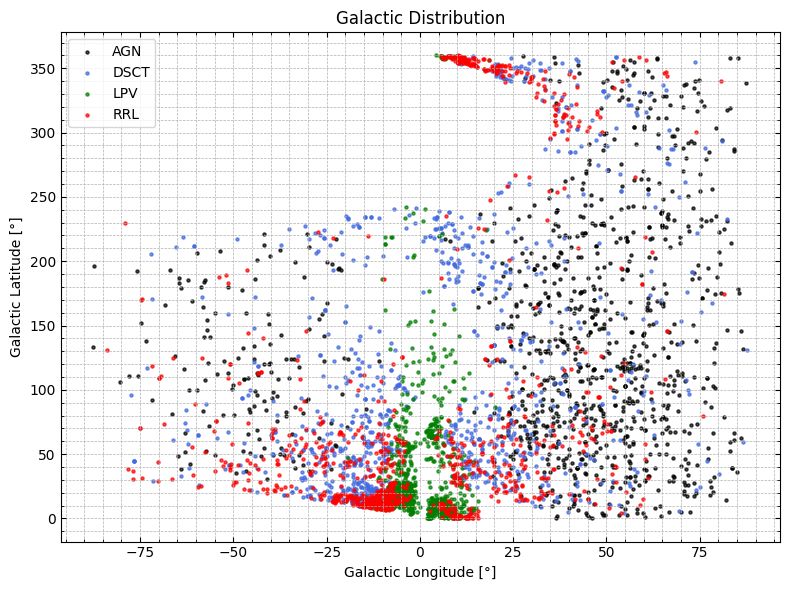

In [ ]:
# Ploteo de coordenadas galácticas

#Pasar a coordenadas galácticas

COAR= SkyCoord(ra=AGNs.meanra, dec=AGNs.meandec,unit="degree") #COORDENADAS EN AR/DEC
COAR_GL=COAR.transform_to(Galactic)

CODSCT= SkyCoord(ra=DSCTs.meanra, dec=DSCTs.meandec,unit="degree") #COORDENADAS EN AR/DEC
CODSCT_GL=CODSCT.transform_to(Galactic)

COLPV= SkyCoord(ra=LPVs.meanra, dec=LPVs.meandec,unit="degree") #COORDENADAS EN AR/DEC
COLPV_GL=COLPV.transform_to(Galactic)

CORRL= SkyCoord(ra=RRLs.meanra, dec=RRLs.meandec,unit="degree") #COORDENADAS EN AR/DEC
CORRL_GL=CORRL.transform_to(Galactic)

plt.figure(figsize=(8, 6))
plt.scatter(COAR_GL.b, COAR_GL.l, c="black",alpha=0.7,s=5,label="AGN")
plt.scatter(CODSCT_GL.b, CODSCT_GL.l, c="royalblue",alpha=0.7,s=5,label="DSCT")
plt.scatter(COLPV_GL.b,COLPV_GL.l, c="green",alpha=0.7,s=5,label="LPV")
plt.scatter(CORRL_GL.b,CORRL_GL.l, c="red",alpha=0.7,s=5,label="RRL")





plt.xlabel('Galactic Longitude [°]')
plt.ylabel('Galactic Latitude [°]')
plt.title('Galactic Distribution')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tight_layout()

In [ ]:
COAR= SkyCoord(ra=AGNs.meanra, dec=AGNs.meandec,unit="degree") #COORDENADAS EN AR/DEC
COAR_GL=COAR.transform_to(Galactic)

CODSCT= SkyCoord(ra=DSCTs.meanra, dec=DSCTs.meandec,unit="degree") #COORDENADAS EN AR/DEC
CODSCT_GL=CODSCT.transform_to(Galactic)

COLPV= SkyCoord(ra=LPVs.meanra, dec=LPVs.meandec,unit="degree") #COORDENADAS EN AR/DEC
COLPV_GL=COLPV.transform_to(Galactic)

CORRL= SkyCoord(ra=RRLs.meanra, dec=RRLs.meandec,unit="degree") #COORDENADAS EN AR/DEC
CORRL_GL=CORRL.transform_to(Galactic)

plt.figure(figsize=(8, 6))
plt.scatter(COAR_GL.b, COAR_GL.l, c="black",alpha=0.7,s=5,label="AGN")
plt.scatter(CORRL_GL.b,CORRL_GL.l, c="red",alpha=0.7,s=5,label="RRL")





plt.xlabel('Galactic Longitude [°]')
plt.ylabel('Galactic Latitude [°]')
plt.title('Galactic Distribution')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tight_layout()

HISTOGRAMAS DISTRIBUCIÓN

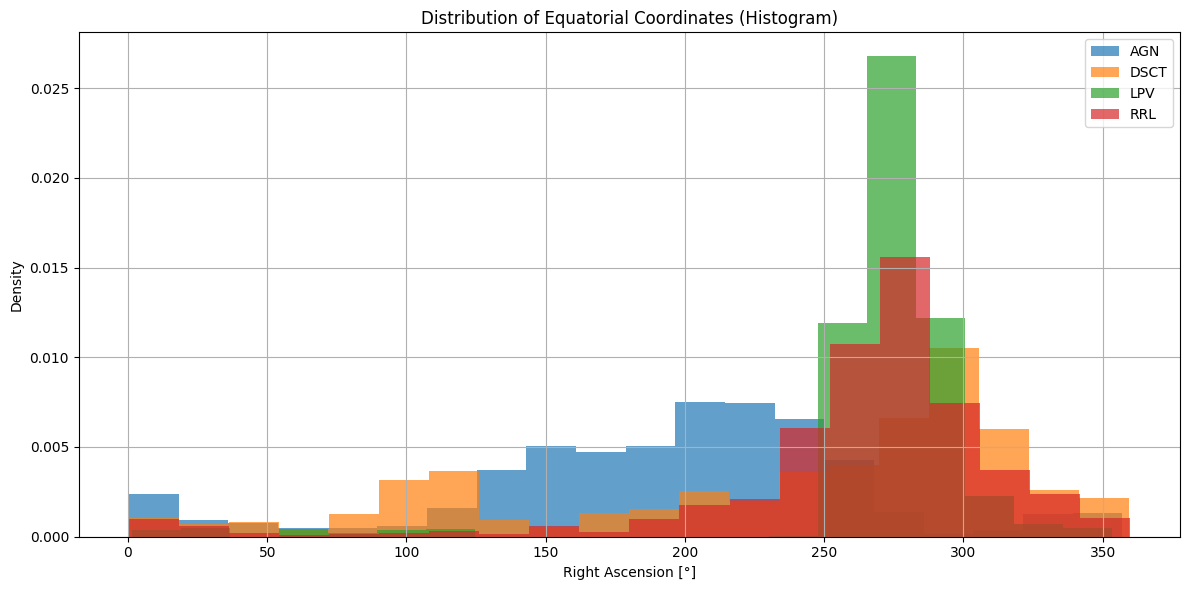

In [ ]:
### COORDENADAS ECUATORIALES

plt.figure(figsize=(12, 6))


plt.hist(AGNs.meanra, bins=20, alpha=0.7, label="AGN", density=True)
plt.hist(AR_DSCT, bins=20, alpha=0.7, label="DSCT", density=True)
plt.hist(AR_LPV, bins=20, alpha=0.7, label="LPV", density=True)
plt.hist(AR_RRL, bins=20, alpha=0.7, label="RRL", density=True)

plt.xlabel('Right Ascension [°]')
plt.ylabel('Density')
plt.title('Distribution of Equatorial Coordinates (Histogram)')
plt.legend()
plt.grid(True)
plt.tight_layout()

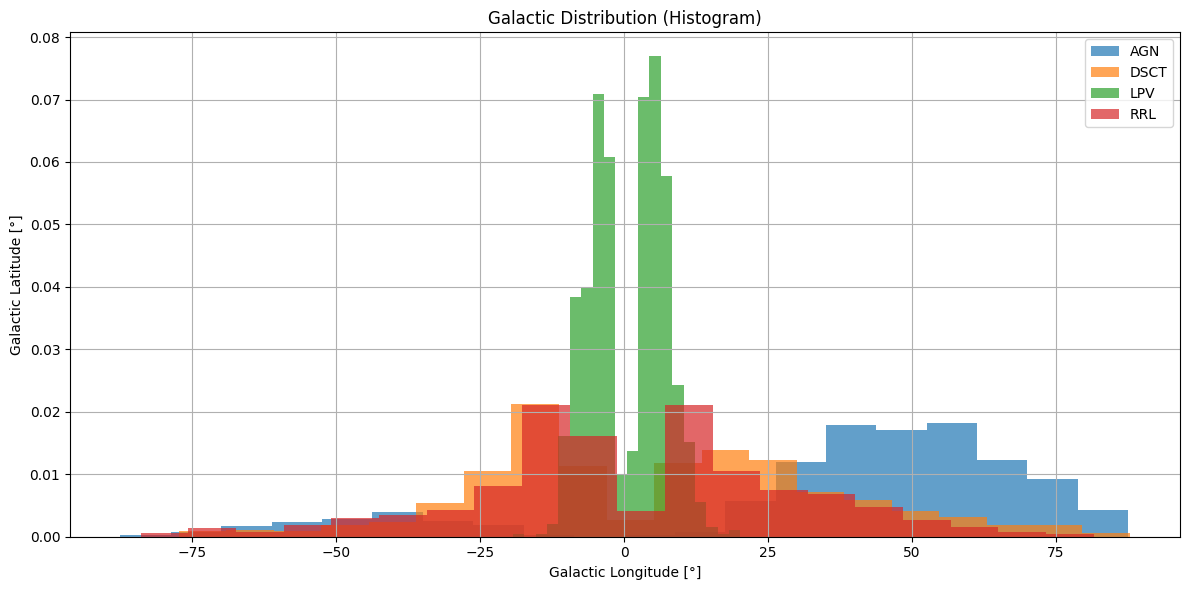

In [ ]:
#COORDENADAS GALÁCTICAS

plt.figure(figsize=(12, 6))


plt.hist(COAR_GL.b, bins=20, alpha=0.7, label="AGN", density=True)
plt.hist(CODSCT_GL.b, bins=20, alpha=0.7, label="DSCT", density=True)
plt.hist(COLPV_GL.b, bins=20, alpha=0.7, label="LPV", density=True)
plt.hist(CORRL_GL.b, bins=20, alpha=0.7, label="RRL", density=True)

plt.xlabel('Galactic Longitude [°]')
plt.ylabel('Galactic Latitude [°]')
plt.title('Galactic Distribution (Histogram)')
plt.legend()
plt.grid(True)
plt.tight_layout()

MAPAS DE DENSIDAD



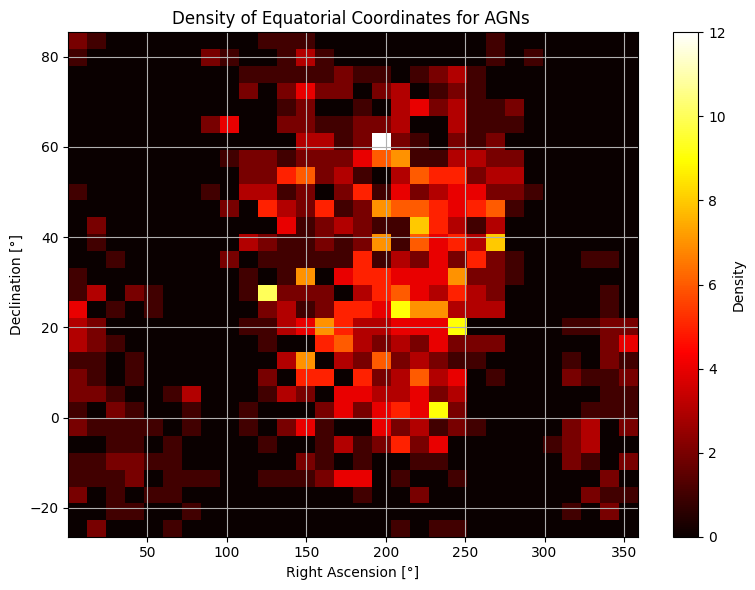

In [ ]:
#COORDENADAS ECUATORIALES

import matplotlib.pyplot as plt
import numpy as np

hist, xbins, ybins = np.histogram2d(AGNs.meanra, AGNs.meandec, bins=(30, 30))

plt.figure(figsize=(8, 6))
plt.imshow(hist.T, extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]], aspect='auto', origin='lower', cmap='hot')

plt.xlabel('Right Ascension [°]')
plt.ylabel('Declination [°]')
plt.title('Density of Equatorial Coordinates for AGNs ')
plt.colorbar(label='Density')
plt.grid(True)
plt.tight_layout()

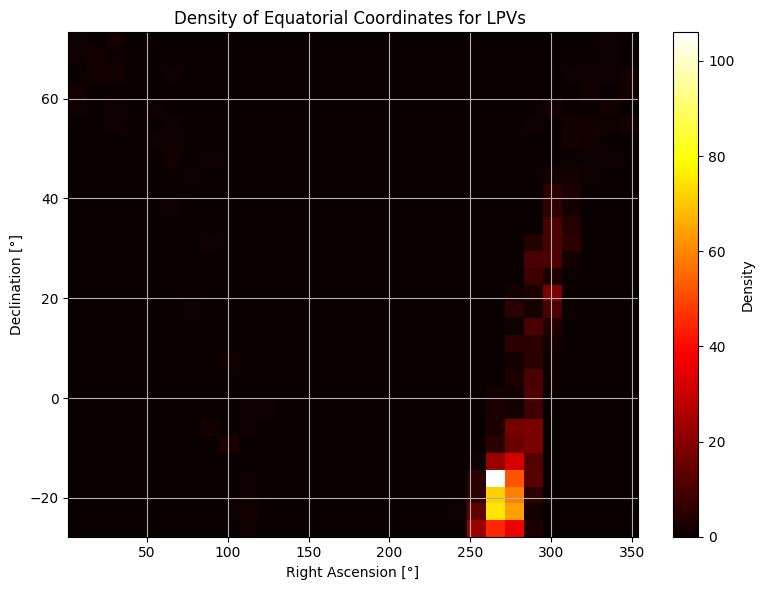

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

hist, xbins, ybins = np.histogram2d(LPVs.meanra, LPVs.meandec, bins=(30, 30))

plt.figure(figsize=(8, 6))
plt.imshow(hist.T, extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]], aspect='auto', origin='lower', cmap='hot')

plt.xlabel('Right Ascension [°]')
plt.ylabel('Declination [°]')
plt.title('Density of Equatorial Coordinates for LPVs ')
plt.colorbar(label='Density')
plt.grid(True)
plt.tight_layout()

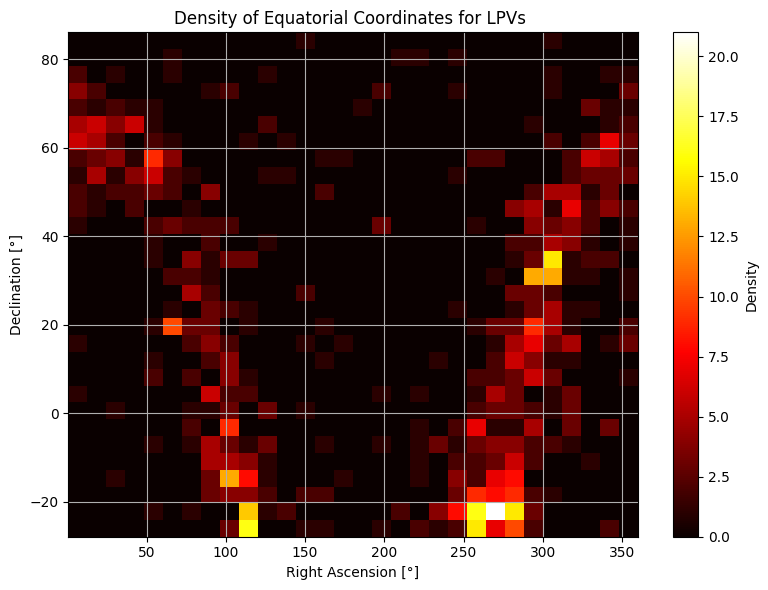

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

hist, xbins, ybins = np.histogram2d(CEPs.meanra, CEPs.meandec, bins=(30, 30))

plt.figure(figsize=(8, 6))
plt.imshow(hist.T, extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]], aspect='auto', origin='lower', cmap='hot')

plt.xlabel('Right Ascension [°]')
plt.ylabel('Declination [°]')
plt.title('Density of Equatorial Coordinates for CEPs ')
plt.colorbar(label='Density')
plt.grid(True)
plt.tight_layout()

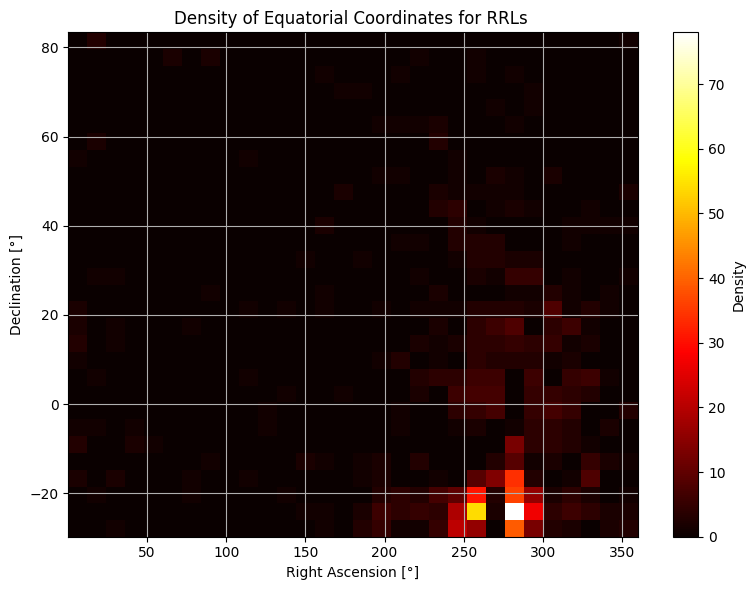

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

hist, xbins, ybins = np.histogram2d(RRLs.meanra, RRLs.meandec, bins=(30, 30))

plt.figure(figsize=(8, 6))
plt.imshow(hist.T, extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]], aspect='auto', origin='lower', cmap='hot')

plt.xlabel('Right Ascension [°]')
plt.ylabel('Declination [°]')
plt.title('Density of Equatorial Coordinates for RRLs ')
plt.colorbar(label='Density')
plt.grid(True)
plt.tight_layout()

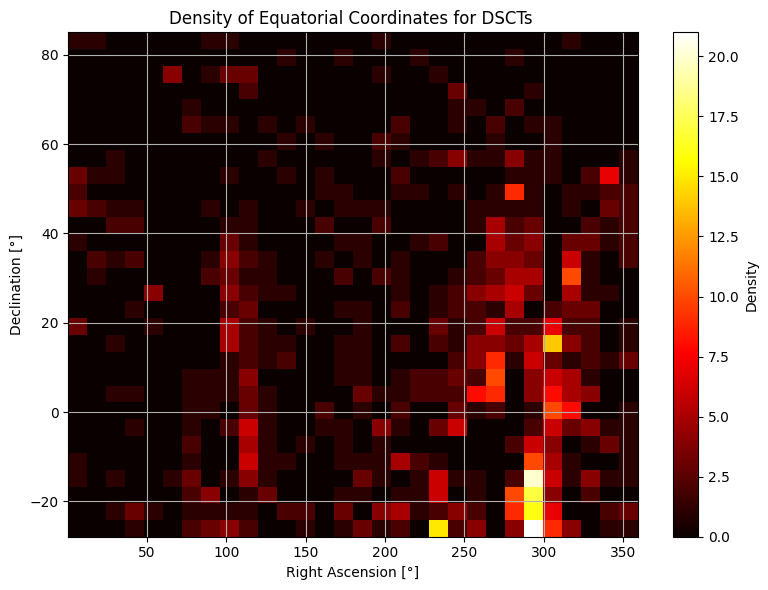

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

hist, xbins, ybins = np.histogram2d(DSCTs.meanra, DSCTs.meandec, bins=(30, 30))

plt.figure(figsize=(8, 6))
plt.imshow(hist.T, extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]], aspect='auto', origin='lower', cmap='hot')

plt.xlabel('Right Ascension [°]')
plt.ylabel('Declination [°]')
plt.title('Density of Equatorial Coordinates for DSCTs ')
plt.colorbar(label='Density')
plt.grid(True)
plt.tight_layout()

In [ ]:
agn_ra = AGNs['meanra'].values
agn_dec = AGNs['meandec'].values
len(agn_ra)
e_ra = Es['meanra'].values
e_dec = Es['meandec'].values
len(e_ra)
cep_ra = CEPs['meanra'].values
cep_dec = CEPs['meandec'].values

qso_ra = QSOs['meanra'].values
qso_dec = QSOs['meandec'].values

NameError: name 'Es' is not defined

In [ ]:
def equatorial_to_galactic(ra, dec):
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)

    X_eq = np.cos(ra_rad) * np.cos(dec_rad)
    Y_eq = np.sin(ra_rad) * np.cos(dec_rad)
    Z_eq = np.sin(dec_rad)

    l_rad = np.arctan2(Y_eq, X_eq)
    b_rad = np.arcsin(Z_eq / np.sqrt(X_eq**2 + Y_eq**2 + Z_eq**2))

    l = np.degrees(l_rad)
    b = np.degrees(b_rad)

    return l, b

In [ ]:
agn_l, agn_b = equatorial_to_galactic(agn_ra, agn_dec)
e_l, e_b = equatorial_to_galactic(e_ra, e_dec)
cep_l, cep_b = equatorial_to_galactic(cep_ra, cep_dec)
qso_l, qso_b = equatorial_to_galactic(qso_ra, qso_dec)

NameError: name 'agn_ra' is not defined

In [ ]:
l_rad_agn = np.radians(agn_l)
b_rad_agn = np.radians(agn_b)

l_rad_e = np.radians(e_l)
b_rad_e = np.radians(e_b)

l_rad_cep = np.radians(cep_l)
b_rad_cep = np.radians(cep_b)

l_rad_qso = np.radians(qso_l)
b_rad_qso = np.radians(qso_b)

print(len(l_rad_cep))

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='aitoff')
ax.grid(True)

#ax.scatter(l_rad_agn, b_rad_agn, color='blue', marker='o', alpha=0.7, label = 'AGN')
ax.scatter(l_rad_e, b_rad_e, color='firebrick', marker='o', alpha = 0.2, label='Eclipsantes')
ax.scatter(l_rad_cep, b_rad_cep, color='forestgreen', marker='o', alpha = 0.4, label = 'Cepheids')
#ax.scatter(l_rad_qso, b_rad_qso, color='yellow', marker='o', alpha = 0.1, label='qso')
plt.legend(loc='best')
plt.show()

NameError: name 'agn_l' is not defined